# MGI MinION Promethion sequence comparisons

A comparison of MGI, MinION, and Promethion taxonomy predictions

In [1]:
import os
import sys

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import json

## Read the mgi and minion _genus_ taxonomy

In [2]:
mgi_df = pd.read_csv("../MGI/Taxonomy/MGI_reads_genus.normalised.tsv.gz", sep='\t', compression='gzip')
mgi_df = mgi_df[mgi_df['taxonomy'].str.contains('k__Bacteria')]
mgi_df = mgi_df[mgi_df['taxonomy'].str.contains('g__')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith('s__')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith('g__')]
mgi_df = mgi_df[~mgi_df['taxonomy'].str.contains('g__;')]
mgi_df = mgi_df.set_index('taxonomy')
mgi_df.index = mgi_df.index.str.split(';').str[-1]
mgi_df.head()

,768745_20190228_BAL,698917_20180329_S,788707_20171213_S,698917_20171207_S,896213_20180427_S,825012_20181113_S,777599_20180306_S,877469_20190115_S,825012_20171129_S,1162967_20180116_S,...,752797_20170918_S,748699_20190114_S,676138_20171001_S,1465461_20180406_S,753522_20180606_S,1112926_20171212_S,788707_20180313_S,720054_20171120_S,701099_20180517_S,1593973_20180504_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
g__Candidatus Aegiribacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
g__Candidatus Kapaibacterium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
g__Candidatus Stahlbacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.854966,0.221969,0.0,0.0,0.000000,0.0,0.0
g__Vermiphilus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.035557,0.0,0.0
g__Candidatus Babela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [3]:
# load the data table
min_df = pd.read_csv("../MinION/Taxonomy/minion_reads_genus.normalised.tsv.gz", sep='\t', compression='gzip')
min_df = min_df[min_df['taxonomy'].str.contains('k__Bacteria')]
min_df = min_df[min_df['taxonomy'].str.contains('g__')]
min_df = min_df[~min_df['taxonomy'].str.endswith('s__')]
min_df = min_df[~min_df['taxonomy'].str.endswith('g__')]
min_df = min_df[~min_df['taxonomy'].str.contains('g__;')]
min_df = min_df.set_index('taxonomy')
min_df.index = min_df.index.str.split(';').str[-1]
min_df.head()

,825012_20181120_S,698917_20171207_S,1586713_20180309_S,748160_20180321_S,1593973_20180504_S,1316979_20171215_S,756934_20181218_S,983493_20180123_S,892355_20180123_S,1651490_20171010_S,...,788707_20180313_S,1565754_20180403_S,639354_20171206_S,1593973_20180427_S,788707_20171213_S,1316935_20180417_S,1565754_20171128_S,785991_20180321_S,658355_20171204_S,748699_20180410_S
taxonomy,,,,,,,,,,,,,,,,,,,,,
g__Candidatus Stahlbacteria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Candidatus Chromulinivorax,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Bradymonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Microvenator,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
g__Candidatus Acididesulfobacter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# load the data table
pro_df = pd.read_csv("../Promethion/Taxonomy/Promethion_genus.norm.tsv.gz", sep='\t', compression='gzip')
pro_df = pro_df[pro_df['taxonomy'].str.contains('k__Bacteria')]
pro_df = pro_df[pro_df['taxonomy'].str.contains('g__')]
pro_df = pro_df[~pro_df['taxonomy'].str.endswith('s__')]
pro_df = pro_df[~pro_df['taxonomy'].str.endswith('g__')]
pro_df = pro_df[~pro_df['taxonomy'].str.contains('g__;')]
pro_df = pro_df.set_index('taxonomy')
pro_df.index = pro_df.index.str.split(';').str[-1]
pro_df.head()

,1565754_20171128_S,1651490_20180206_S,639354_20171206_S,1316979_20171215_S,1128691_20171218_S,1651490_20171010_S,892355_20180123_S,825012_20181120_S,1593973_20180504_S,785991_20180321_S
taxonomy,,,,,,,,,,
g__Acidicapsa,0.000000,0.000000,0.0,1.015659,0.0,0.0,0.0,0.0,0.000000,0.0
g__Candidatus Sulfotelmatomonas,6.668235,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
g__Candidatus Sulfotelmatobacter,0.000000,2.019508,0.0,3.046978,0.0,0.0,0.0,0.0,0.000000,0.0
g__Luteitalea,0.000000,0.000000,0.0,1.015659,0.0,0.0,0.0,0.0,0.000000,0.0
g__Candidatus Hakubella,0.000000,0.000000,0.0,11.172254,0.0,0.0,0.0,0.0,1.049565,0.0


## Align the taxonomies so the indexes overlap

In [5]:
common_taxa = min_df.index.intersection(pro_df.index).intersection(mgi_df.index)
# Create subsets of the DataFrames containing only the common taxonomies
mgi_common = mgi_df.loc[common_taxa]
min_common = min_df.loc[common_taxa]
pro_common = pro_df.loc[common_taxa]
print(f"MGI: Before alignment {mgi_df.shape} After alignment: {mgi_common.shape}")
print(f"MinION: Before alignment {min_df.shape} After alignment: {min_common.shape}")
print(f"Promethion: Before alignment {pro_df.shape} After alignment: {pro_common.shape}")

MGI: Before alignment (3581, 127) After alignment: (741, 127)
MinION: Before alignment (1433, 60) After alignment: (741, 60)
Promethion: Before alignment (1000, 10) After alignment: (741, 10)


## Correlations

taxonomy
g__Pseudomonas          -0.151848
g__Gilliamella          -0.124298
g__Flavobacterium       -0.116440
g__Pilibacter           -0.115379
g__Cutibacterium        -0.114149
                           ...   
g__Scardovia             0.991785
g__Morococcus            0.991921
g__Eggerthia             0.992277
g__Lacticaseibacillus    0.998934
g__Keratinibaculum       1.000000
Length: 741, dtype: float64
At the genus level, the median correlation between MGI and MinION is 0.181


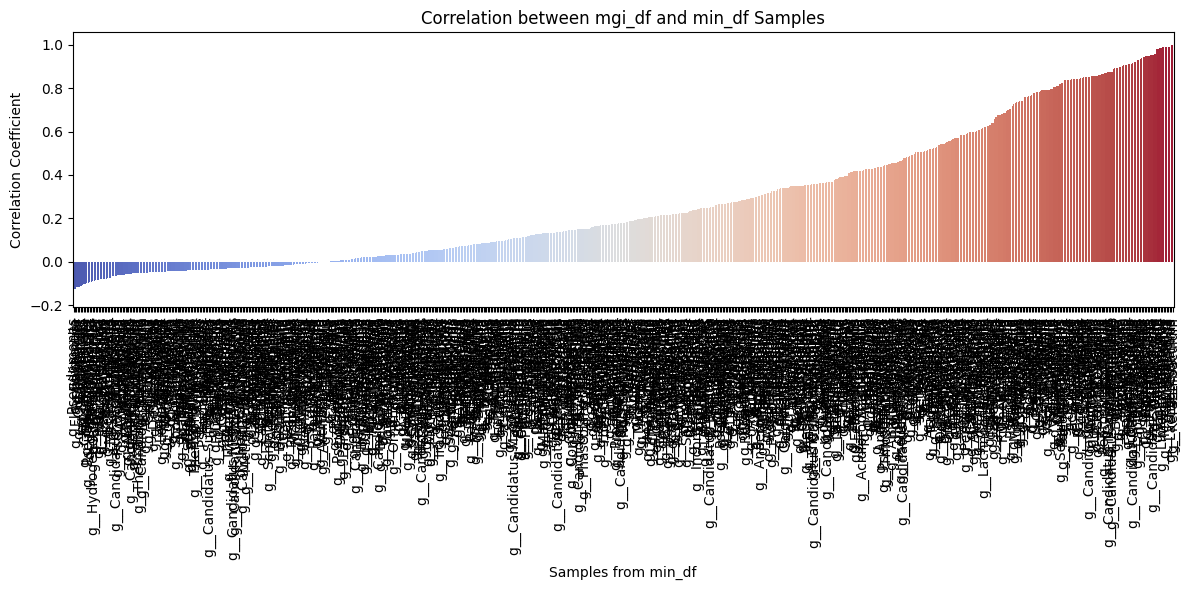

In [6]:
correlation_results = mgi_common.corrwith(min_common, axis=1)

# Display the correlation results
correlation_results = correlation_results.sort_values()
print(correlation_results)
print(f"At the genus level, the median correlation between MGI and MinION is {correlation_results.median():.3f}")

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_results.index, y=correlation_results.values, hue=correlation_results.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation between mgi_df and min_df Samples')
plt.xlabel('Samples from min_df')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

In [7]:
correlation_results.dropna()

taxonomy
g__Pseudomonas          -0.151848
g__Gilliamella          -0.124298
g__Flavobacterium       -0.116440
g__Pilibacter           -0.115379
g__Cutibacterium        -0.114149
                           ...   
g__Scardovia             0.991785
g__Morococcus            0.991921
g__Eggerthia             0.992277
g__Lacticaseibacillus    0.998934
g__Keratinibaculum       1.000000
Length: 741, dtype: float64

taxonomy
g__Acinetobacter     -0.577413
g__Lactobacillus     -0.477413
g__Citrobacter       -0.404251
g__Chromobacterium   -0.372153
g__Pseudomonas       -0.368423
                        ...   
g__Lachnobacterium    1.000000
g__Acetobacterium     1.000000
g__Gulosibacter       1.000000
g__Risungbinella      1.000000
g__Dermabacter        1.000000
Length: 428, dtype: float64
At the genus level, the median correlation between MinION and Promethion is 0.220


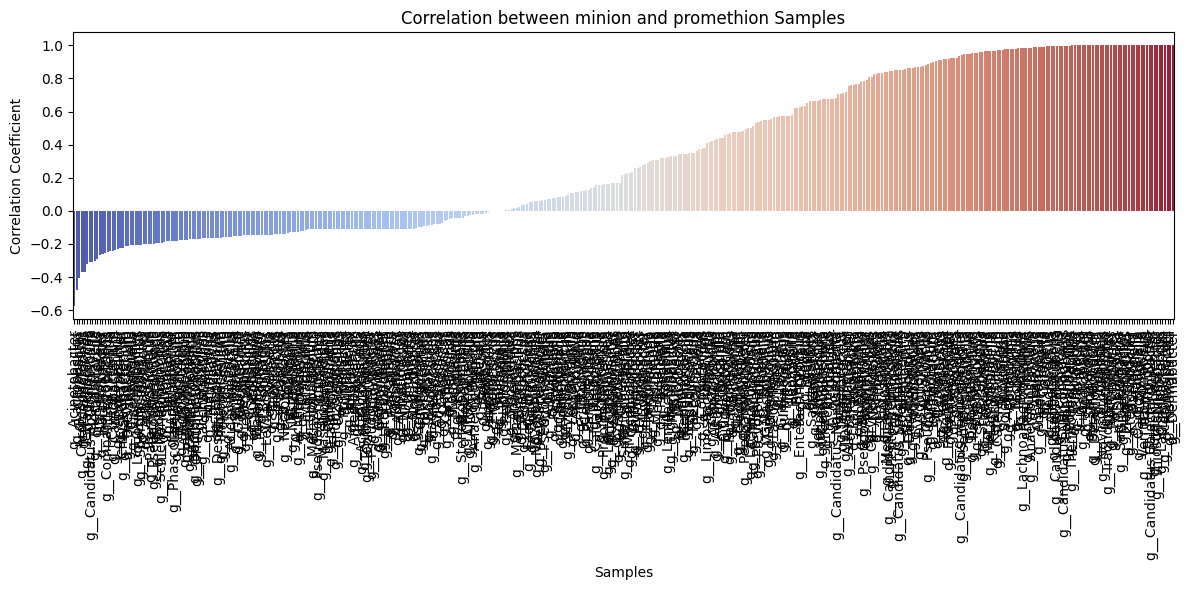

In [8]:
correlation_results = min_common.corrwith(pro_common, axis=1)

# Display the correlation results
correlation_results = correlation_results.dropna().sort_values()
print(correlation_results)
print(f"At the genus level, the median correlation between MinION and Promethion is {correlation_results.median():.3f}")

# Plot the results
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=correlation_results.index, y=correlation_results.values, hue=correlation_results.index, palette='coolwarm')
plt.xticks(rotation=90)
ax.set_title('Correlation between minion and promethion Samples')
ax.set_xlabel('Samples')
ax.set_ylabel('Correlation Coefficient')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

# Different taxonomic levels

We can repeat the above with different taxonomic levels. I removed some of the redundancy and explanations here, so look above for details

At the kingdom level, the mean correlation is 0.960 and the median correlation is 0.960
At the phylum level, the mean correlation is 0.110 and the median correlation is -0.078
At the class level, the mean correlation is 0.309 and the median correlation is 0.180
At the order level, the mean correlation is 0.288 and the median correlation is 0.125
At the family level, the mean correlation is 0.303 and the median correlation is 0.147
At the genus level, the mean correlation is 0.330 and the median correlation is 0.220


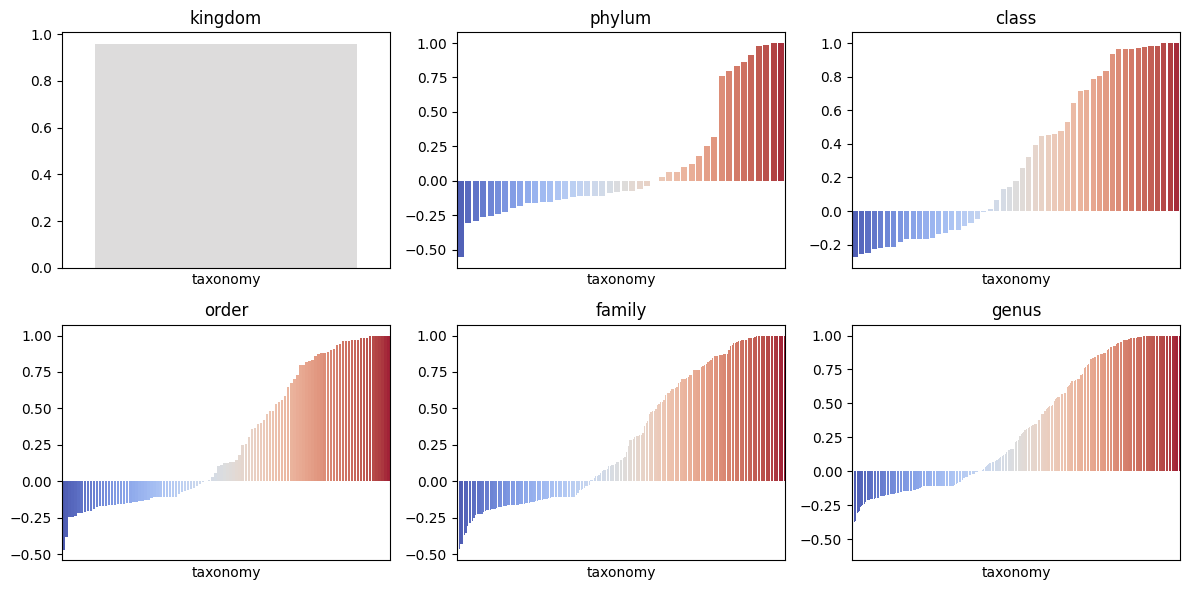

In [9]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']


fig, ax = plt.subplots(2, 3, figsize=(12, 6))

row = 0
col = 0
for i, tax in enumerate(taxonomies):

    # read the MGI data 
    mgi_df = pd.read_csv(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", sep='\t', compression='gzip')
    mgi_df = mgi_df[mgi_df['taxonomy'].str.contains('k__Bacteria')]
    mgi_df = mgi_df[mgi_df['taxonomy'].str.contains(f'{tax[0]}__')]
    mgi_df = mgi_df[~mgi_df['taxonomy'].str.endswith(f'{tax[0]}__')]
    mgi_df = mgi_df.set_index('taxonomy')
    mgi_df.index = mgi_df.index.str.split(';').str[-1]

    # load the data table
    min_df = pd.read_csv(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", sep='\t', compression='gzip')
    min_df = min_df[min_df['taxonomy'].str.contains('k__Bacteria')]
    min_df = min_df[min_df['taxonomy'].str.contains(f'{tax[0]}__')]
    min_df = min_df[~min_df['taxonomy'].str.endswith(f'{tax[0]}__')]
    min_df = min_df.set_index('taxonomy')
    min_df.index = min_df.index.str.split(';').str[-1]

    pro_df = pd.read_csv(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", sep='\t', compression='gzip')
    pro_df = pro_df[pro_df['taxonomy'].str.contains('k__Bacteria')]
    pro_df = pro_df[pro_df['taxonomy'].str.contains(f'{tax[0]}__')]
    pro_df = pro_df[~pro_df['taxonomy'].str.endswith(f'{tax[0]}__')]
    pro_df = pro_df.set_index('taxonomy')
    pro_df.index = pro_df.index.str.split(';').str[-1]

    common_taxonomies = mgi_df.index.intersection(min_df.index).intersection(pro_df.index)

    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_common = mgi_df.loc[common_taxonomies]
    min_common = min_df.loc[common_taxonomies]
    pro_common = pro_df.loc[common_taxonomies]
    
    # correlation_results = mgi_common.corrwith(min_common, axis=1)
    correlation_results = pro_common.corrwith(min_common, axis=1)

    # Display the correlation results
    correlation_results = correlation_results.dropna().sort_values()

    # Plot the results

    sns.barplot(x=correlation_results.index, y=correlation_results.values, hue=correlation_results.index, palette='coolwarm', ax=ax[row][col])
    ax[row][col].title.set_text(tax)
    ax[row][col].set_xticks([])
    print(f"At the {tax} level, the mean correlation is {correlation_results.mean():.3f} and the median correlation is {correlation_results.median():.3f}")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
#plt.xticks(None)
#plt.title('Correlation between mgi_df and min_df Samples')
#plt.xlabel('Samples from min_df')
#plt.ylabel('Correlation Coefficient')
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## Visualising Presence/Absence

Direct correlation - especially of normalised data - may not be the best way to address this. We really care whether something is seen in both data frames, so lets take a look at the presence/absence matrix

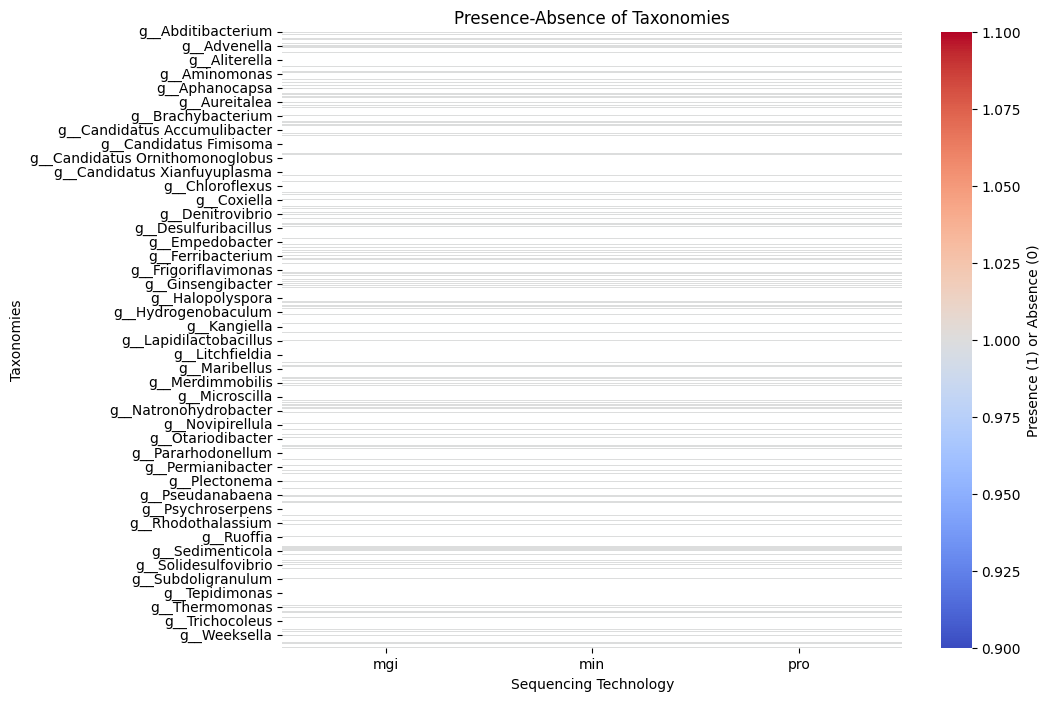

In [10]:
# Convert both DataFrames to binary presence-absence (1 if any value, 0 otherwise)
mgi_presence = (mgi_df > 0).astype(int)
min_presence = (min_df > 0).astype(int)
pro_presence = (pro_df > 0).astype(int)

# Find common taxonomies
all_taxonomies = mgi_df.index.union(min_df.index).union(pro_df.index)

# Create a presence-absence DataFrame for the common taxonomies
all_presence = pd.DataFrame(index=all_taxonomies)

# Add presence data from mgi_df
all_presence['mgi'] = mgi_presence.loc[common_taxonomies].max(axis=1)

# Add presence data from min_df
all_presence['min'] = min_presence.loc[common_taxonomies].max(axis=1)
all_presence['pro'] = pro_presence.loc[common_taxonomies].max(axis=1)

# Visualize using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(all_presence, cmap='coolwarm', annot=False, cbar_kws={'label': 'Presence (1) or Absence (0)'})
plt.title('Presence-Absence of Taxonomies')
plt.ylabel('Taxonomies')
plt.xlabel('Sequencing Technology')
plt.show()

In [11]:
common_columns = mgi_df.columns.intersection(min_df.columns).intersection(pro_df.columns)
min_both = min_df[common_columns]
mgi_both = mgi_df[common_columns]
pro_both = pro_df[common_columns]

mgi_presence = (mgi_both > 0).astype(int)
min_presence = (min_both > 0).astype(int)*2
pro_presence = (pro_both > 0).astype(int)*4

both = mgi_presence.add(min_presence, fill_value=0).add(pro_presence, fill_value=0)

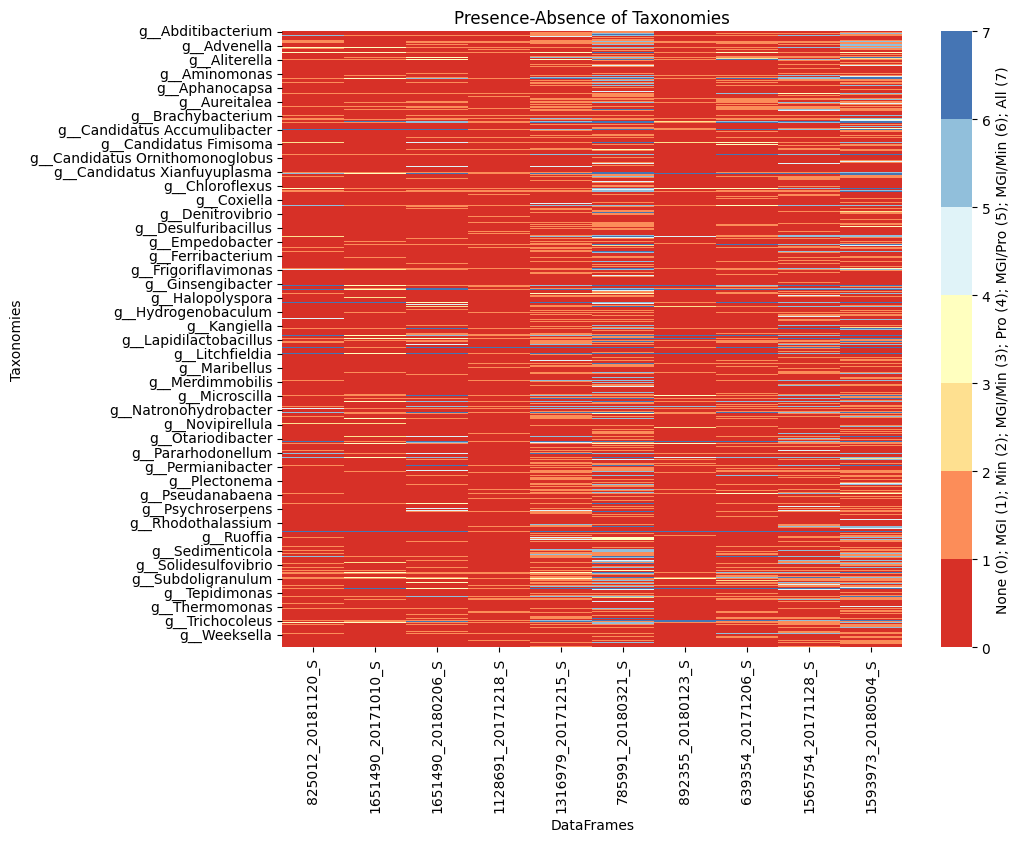

In [12]:
# Visualize using a heatmap
plt.figure(figsize=(10, 8))
#cmap = ListedColormap(['blue', 'green', 'orange', 'red'])
colors = ['#d73027', '#fc8d59', '#fee090', '#ffffbf', '#e0f3f8', '#91bfdb', '#4575b4']
cmap = ListedColormap(colors)

sns.heatmap(both, cmap=cmap, vmin=0, vmax=7, annot=False, cbar_kws={'ticks': [0,1,2,3,4,5,6,7], 'label': 'None (0); MGI (1); Min (2); MGI/Min (3); Pro (4); MGI/Pro (5); MGI/Min (6); All (7)'})
plt.title('Presence-Absence of Taxonomies')
plt.ylabel('Taxonomies')
plt.xlabel('DataFrames')
plt.show()

## Plot heat maps for all taxonomies

We do a bunch of additional stuff, including sorting by the row sums, and setting titles, etc

First, we predefine some functions to get the taxonomy data to reduce the amount of copying/pasting. We also include a method to create a presence/absence matrix and
sort the numbers by the row sums.

In [13]:
def read_taxonomy(tax_file, firstchar, minreads = 0):
    """
    Read the taxonomy file and return a data frame
    """
    
    df = pd.read_csv(tax_file, sep='\t', compression='gzip')
    df = df[df['taxonomy'].str.contains('k__Bacteria')]
    df = df[df['taxonomy'].str.contains(f'{firstchar}__')]
    df = df[~df['taxonomy'].str.endswith(f'{firstchar}__')]
    df = df.set_index('taxonomy')
    df.index = df.index.str.split(';').str[-1]
    if minreads: 
        df = df[~(df.lt(minreads).all(axis=1))]
    # here we average all the samples that have the same name. We may see this, eg. in Genus where we have different Streptococcuses in different samples
    df = df.groupby(df.index).mean()
    df = df.sort_index(axis=1)
    
    return df

def sorted_presence_absence(df1, df2, df3, minrowsum=0, asc_sort=False):
    """
    Join the two tables and return the sorted version
    """
    # filter so we only include samples sequenced on both MGI and MinION
    common_columns = df1.columns.intersection(df2.columns).intersection(df3.columns)
    df1_both = df1[common_columns]
    df2_both = df2[common_columns]
    df3_both = df3[common_columns]
    
    # create a presence/absence matrix
    df1_presence = (df1_both > 0).astype(int)
    df2_presence = (df2_both > 0).astype(int)*2
    df3_presence = (df3_both > 0).astype(int)*4
    
    # here we filter on the minimum number of columns each taxa is in if requested
    if minrowsum > 0:
        df1_presence = df1_presence.loc[df1_presence[df1_presence.sum(axis=1) > minrowsum].index]
        df2_presence = df2_presence.loc[df2_presence[df2_presence.sum(axis=1) > (2 * minrowsum)].index]
        df3_presence = df3_presence.loc[df3_presence[df3_presence.sum(axis=1) > (4 * minrowsum)].index]
    
    # combine the  matrices and sort them
    both = df1_presence.add(df2_presence, fill_value=0).add(df3_presence, fill_value=0)
    sboth = both.loc[both.sum(axis=1).sort_values(ascending=asc_sort).index]
    sboth = sboth.sort_index(axis=1) # sort by column names

    return sboth

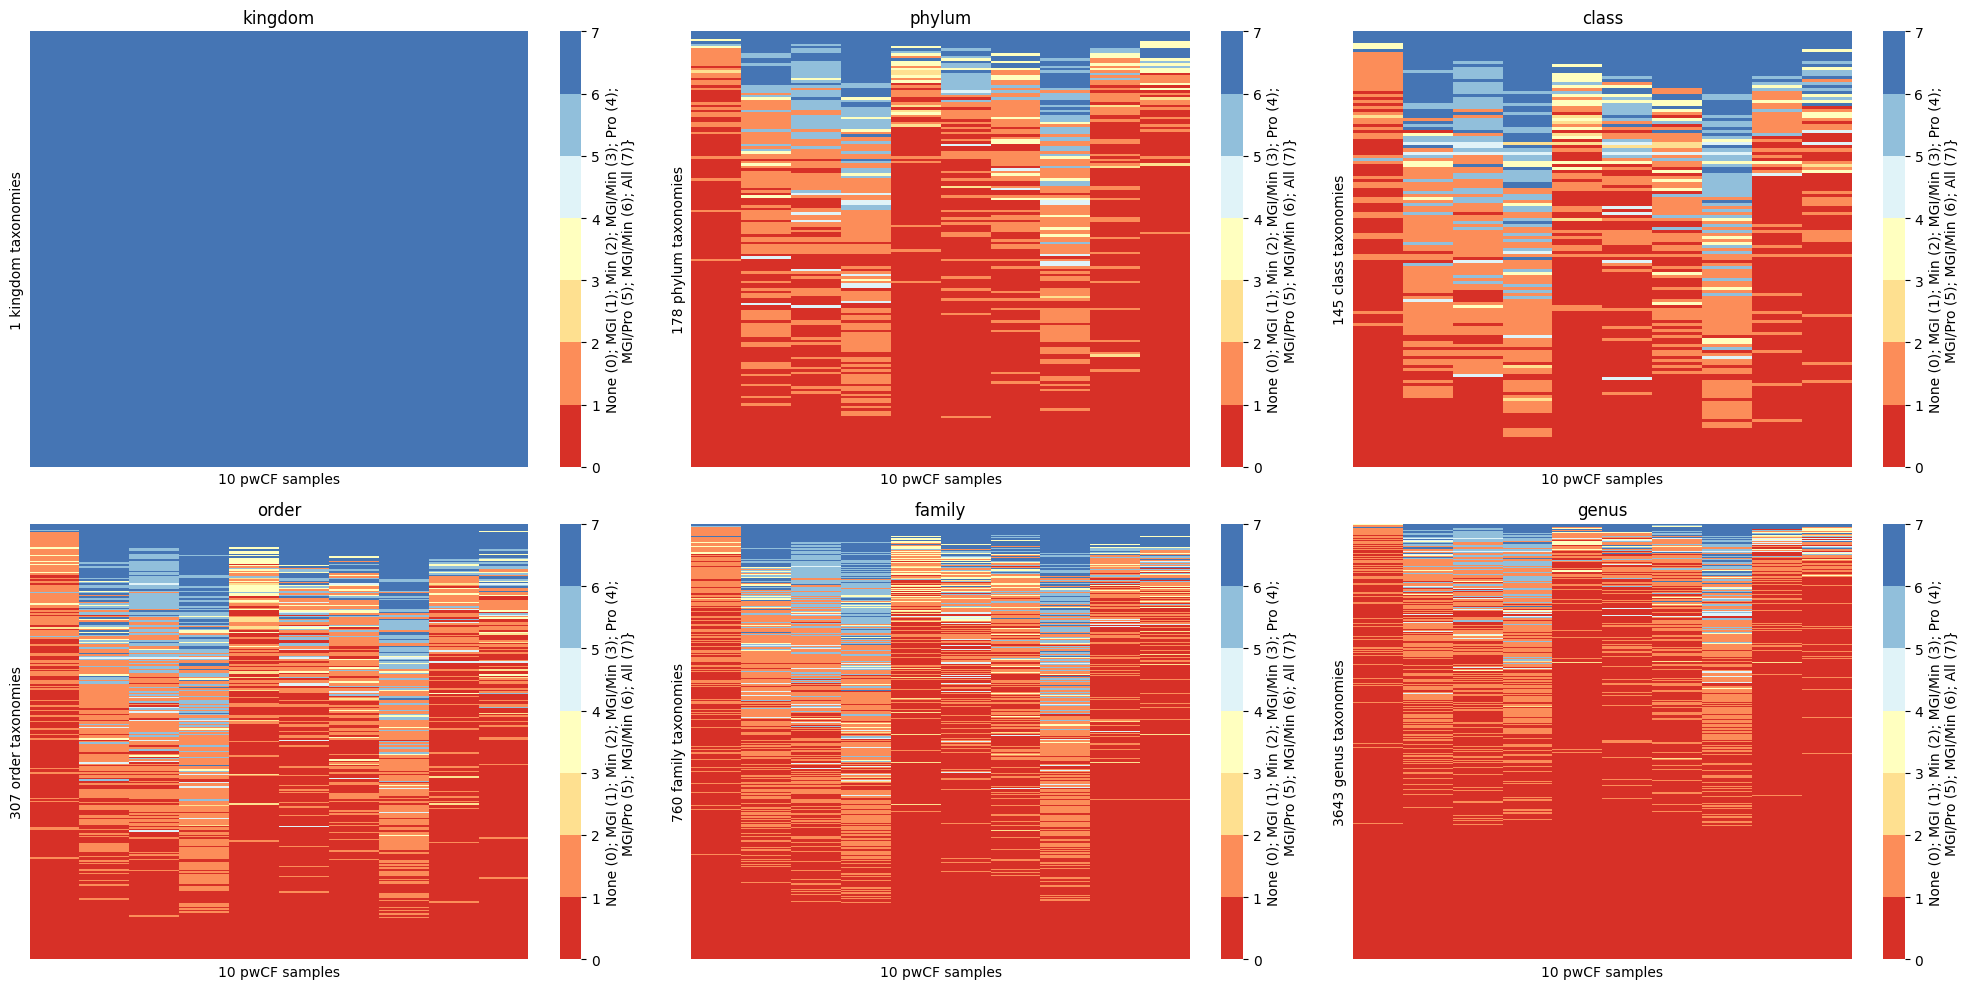

In [14]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

colors = ['#d73027', '#fc8d59', '#fee090', '#ffffbf', '#e0f3f8', '#91bfdb', '#4575b4']
cmap = ListedColormap(colors)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])
    pro_df = read_taxonomy(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", tax[0])
    sboth = sorted_presence_absence(mgi_df, min_df, pro_df, 0)

    g = sns.heatmap(sboth, cmap=cmap, vmin=0, vmax=7, annot=False, cbar_kws={'ticks': [0,1,2,3,4,5,6,7], 'label': "None (0); MGI (1); Min (2); MGI/Min (3); Pro (4);\nMGI/Pro (5); MGI/Min (6); All (7)}"}, ax=ax[row][col])

    g.title.set_text(tax)
    g.set_xticks([])
    g.set_yticks([])
    g.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    g.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## Filtering for _just_ the MinION sequences _and_ things in more than one sample

Setting the minrowsum limits the minimum number of samples each taxa can be in. We have 59 MGI and MinION samples, so setting that to 40 means ~2/3 of the samples.

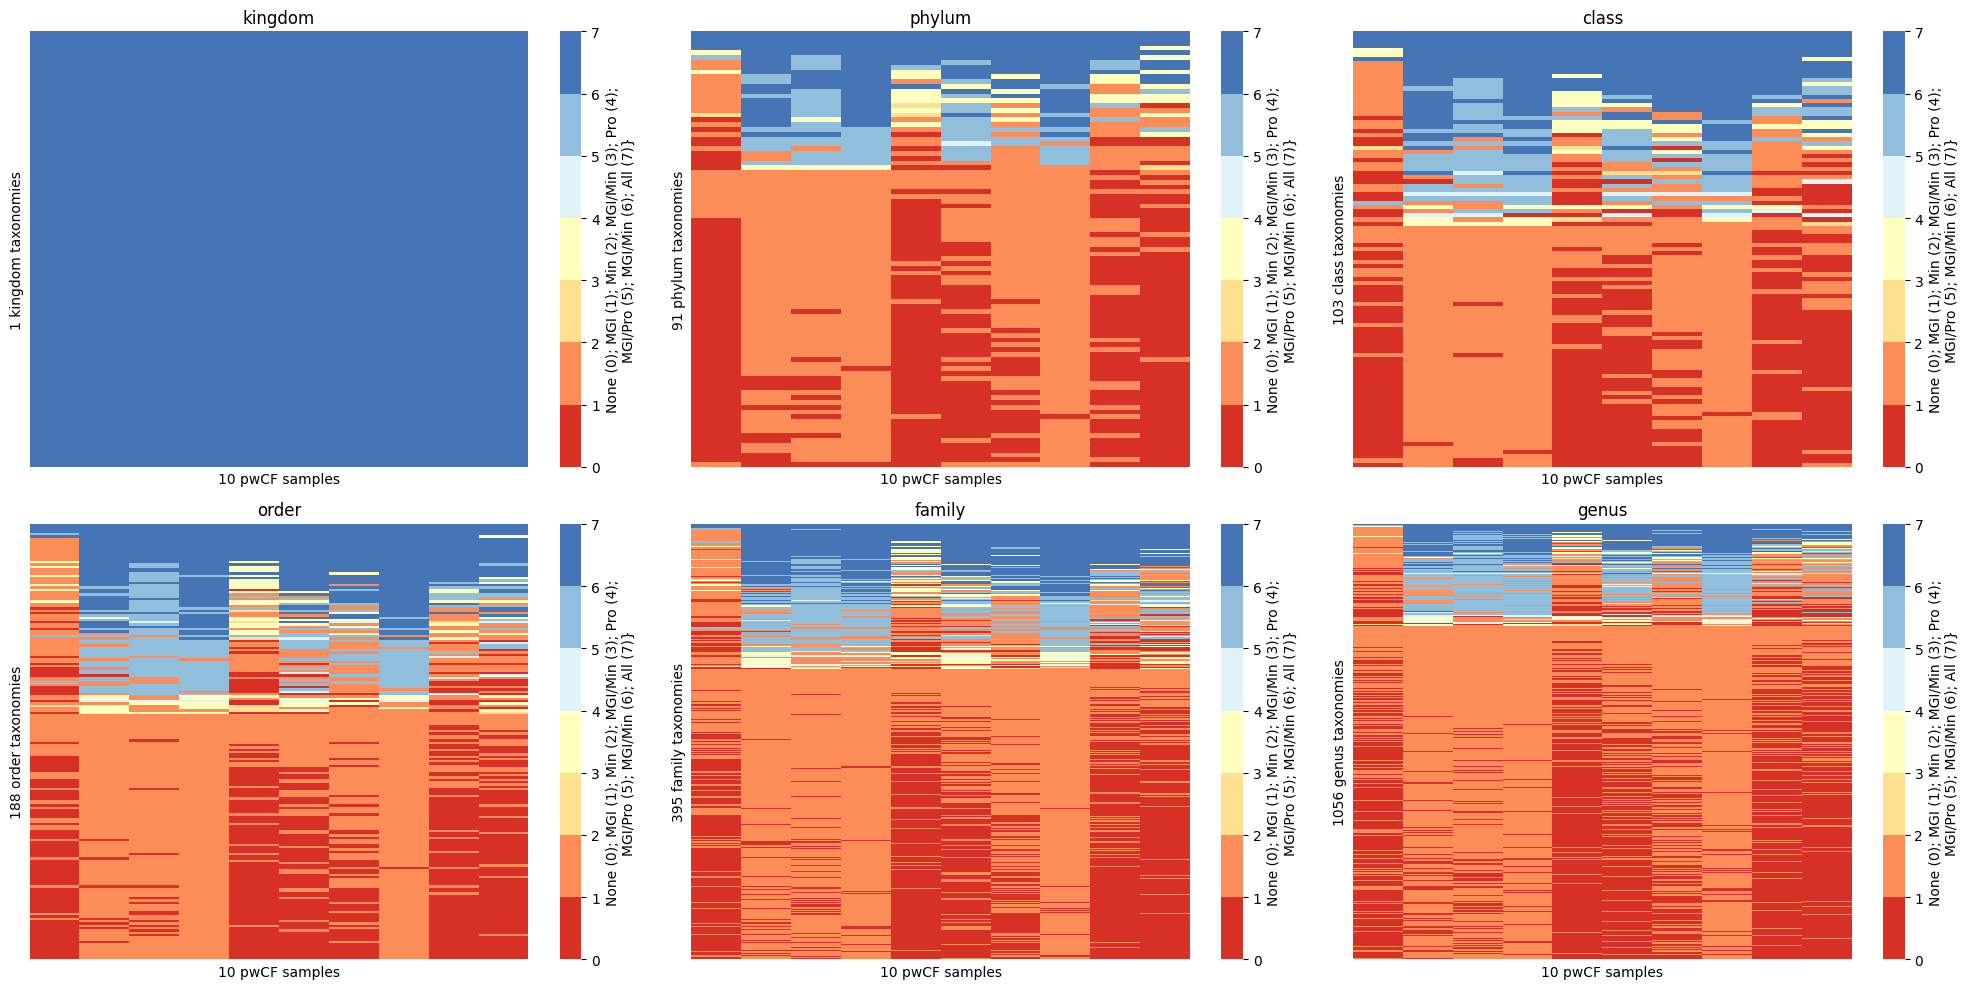

In [15]:
taxonomies = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus']

colors = ['#d73027', '#fc8d59', '#fee090', '#ffffbf', '#e0f3f8', '#91bfdb', '#4575b4']
cmap = ListedColormap(colors)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])
    pro_df = read_taxonomy(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", tax[0])
    sboth = sorted_presence_absence(mgi_df, min_df, pro_df, minrowsum=3)

    g = sns.heatmap(sboth, cmap=cmap, vmin=0, vmax=7, annot=False, cbar_kws={'ticks': [0,1,2,3,4,5,6,7], 'label': "None (0); MGI (1); Min (2); MGI/Min (3); Pro (4);\nMGI/Pro (5); MGI/Min (6); All (7)}"}, ax=ax[row][col])

    g.title.set_text(tax)
    g.set_xticks([])
    g.set_yticks([])
    g.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    g.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

## 3-D heatmap

Attempt to make a 3-D heatmap using the family data.

In [16]:
def convert_df_xyz(mgi_df, sboth):
    """
    Convert the data frame into xyz values. X and Y come from `sboth` (sorted both MGI & Minion) and Z comes from MGI coverage.
    """
   
    # we need to get the MGI data in the same order as the sboth dataframe
    mgi_reorg = mgi_df.reindex(index=sboth.index, columns=sboth.columns)

    # Prepare data for 3D plot
    x = np.arange(sboth.shape[1])  # x coordinates (samples)
    y = np.arange(sboth.shape[0])  # y coordinates (taxa)
    x, y = np.meshgrid(x, y)  # Create a meshgrid for x and y
    z = mgi_reorg.values  # Height values

    return (x, y, z)

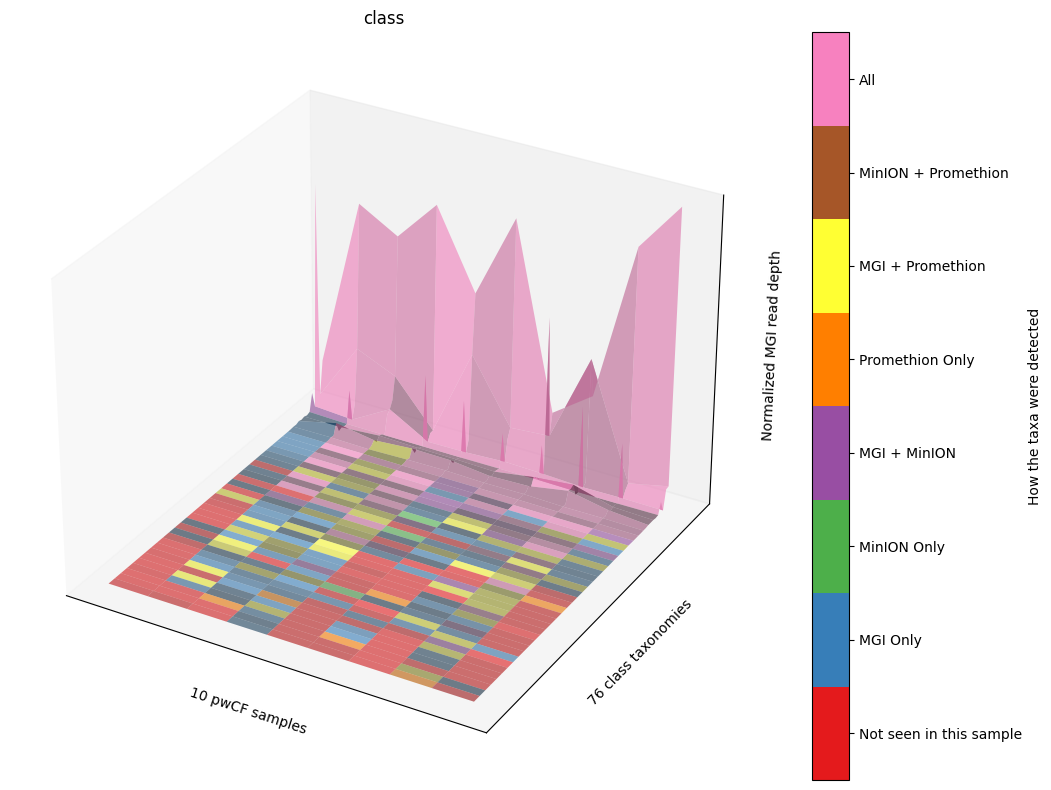

In [17]:
tax='class'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])
pro_df = read_taxonomy(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", tax[0])
common_taxonomies = mgi_df.index.intersection(min_df.index).intersection(pro_df.index)

# Create subsets of the DataFrames containing only the common taxonomies
mgi_df_l = mgi_df.loc[common_taxonomies]
min_df_l = min_df.loc[common_taxonomies]
pro_df_l = pro_df.loc[common_taxonomies]

sboth = sorted_presence_absence(mgi_df_l, min_df_l, pro_df_l, minrowsum=0, asc_sort=True)
x, y, z = convert_df_xyz(mgi_df_l, sboth)

# Define a color map based on the heatmap values
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']


cmap = ListedColormap(colors)
colors = cmap(sboth.values / sboth.values.max())

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', alpha=0.6, vmin=0, vmax=8, antialiased=True)

# Set labels
ax.title.set_text(tax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
ax.set_zlabel("Normalized MGI read depth")

# Show color bar
mappable = plt.cm.ScalarMappable(cmap=cmap)
mappable.set_array(np.linspace(0, 8, 256))  # Color bar mapping
cbar = plt.colorbar(mappable, ax=ax, alpha=0.6)
cbar.set_label('How the taxa were detected')
cbar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'MGI + MinION', 'Promethion Only', 'MGI + Promethion', 'MinION + Promethion', 'All'])

plt.tight_layout()  # Adjust layout to make room for the x-axis labels
plt.show()

# Plot all the taxonomies on separate images

This code makes separate `.png` and `.svg` images for each plot. I like this better as we can composit them into a single image later

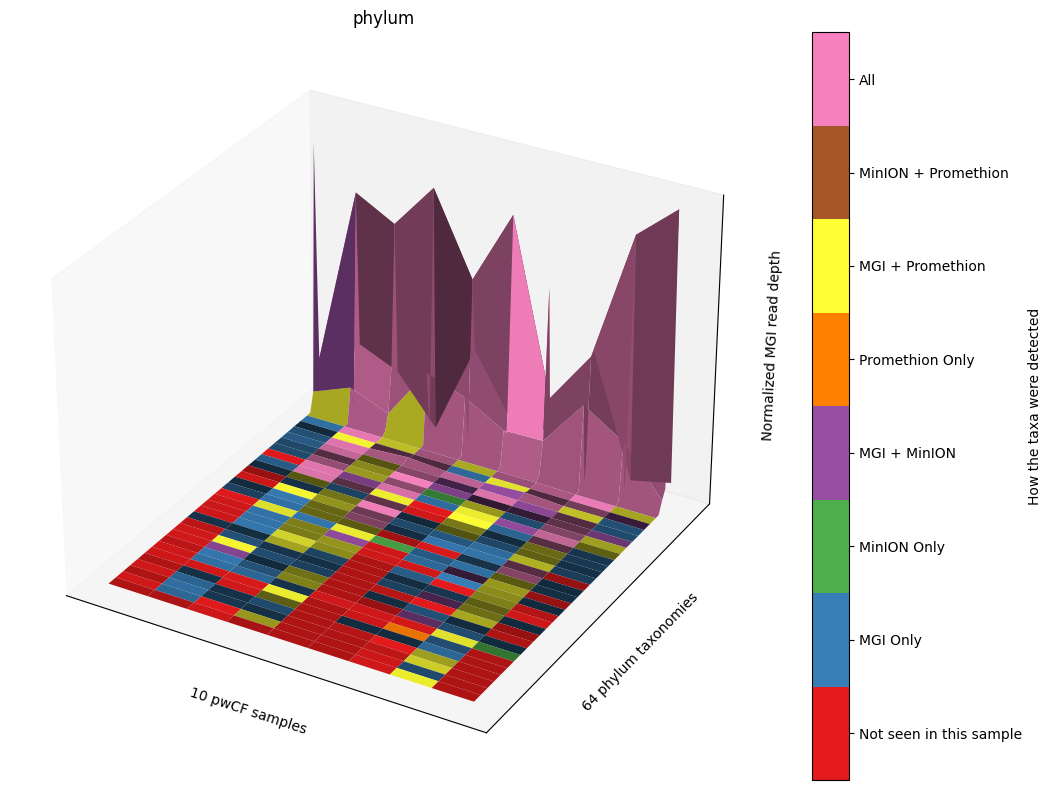

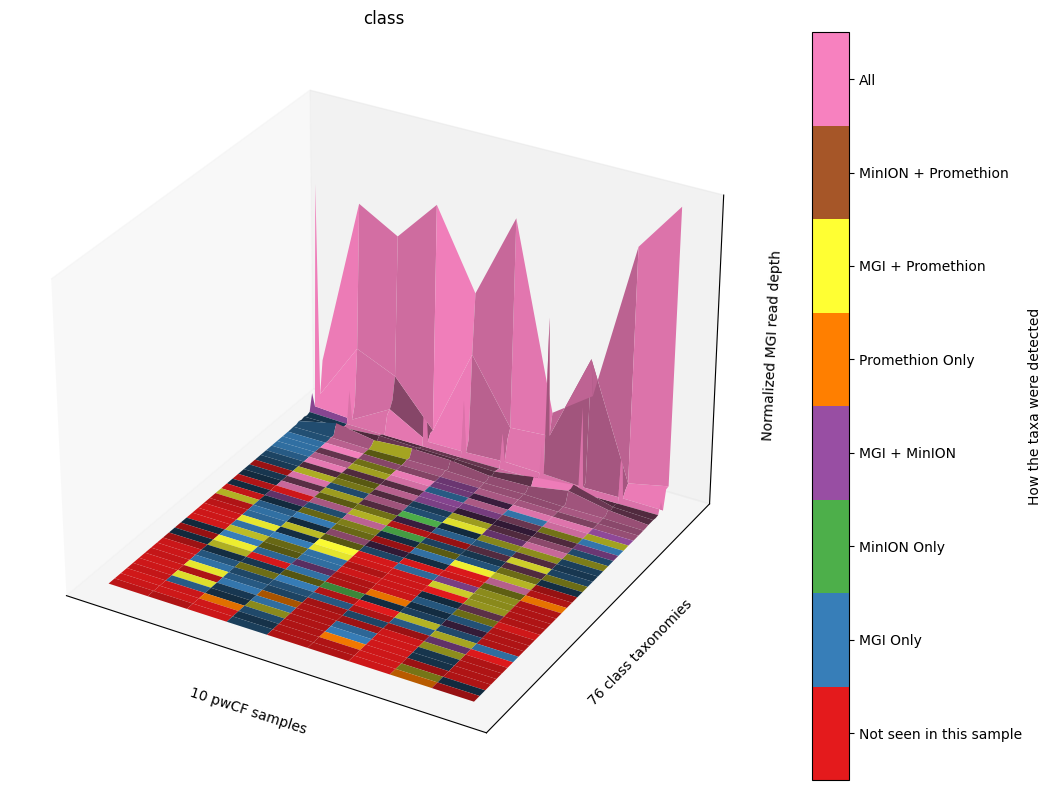

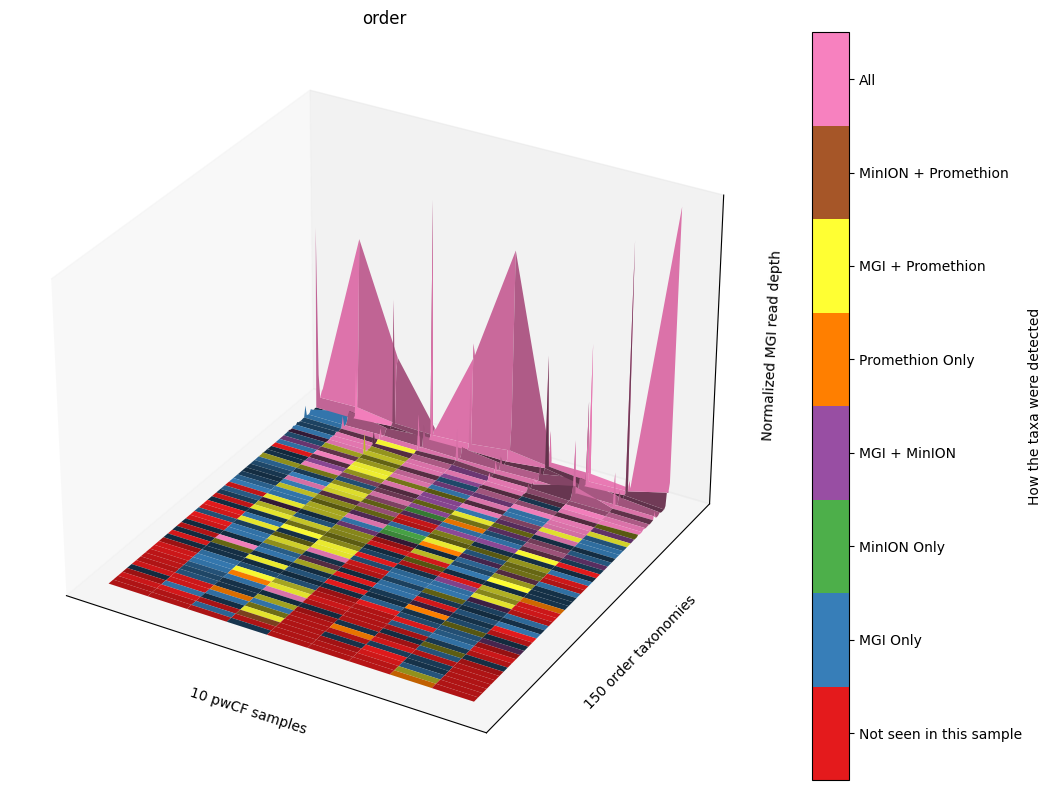

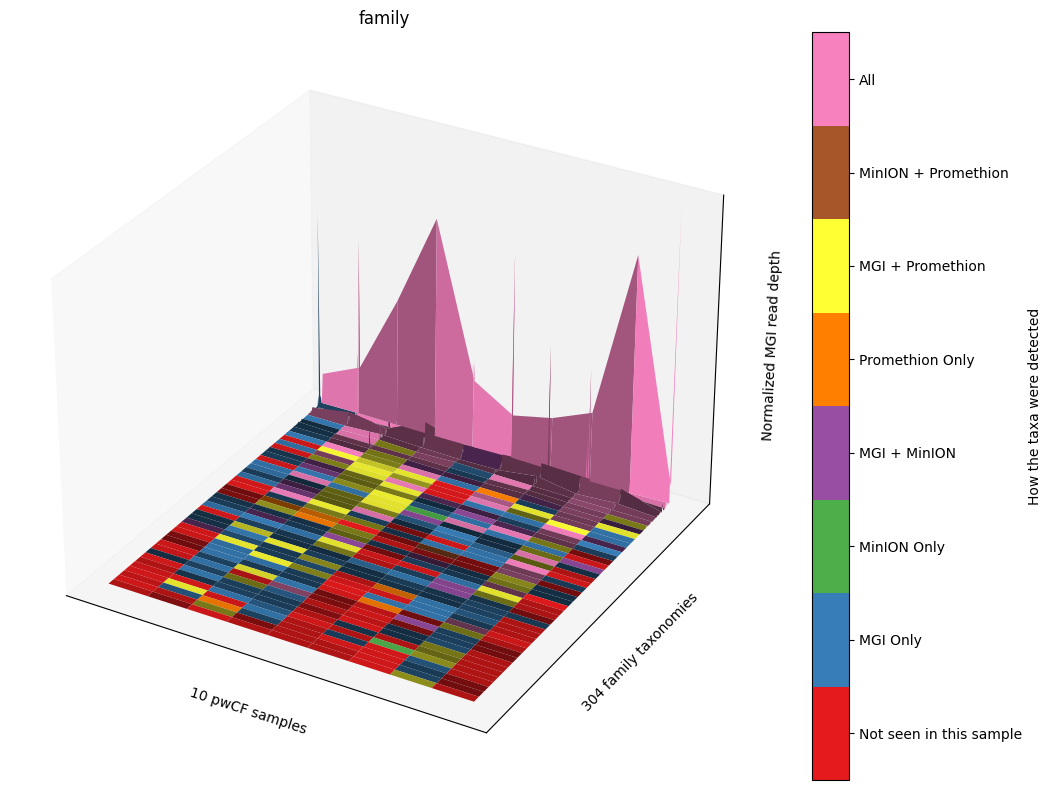

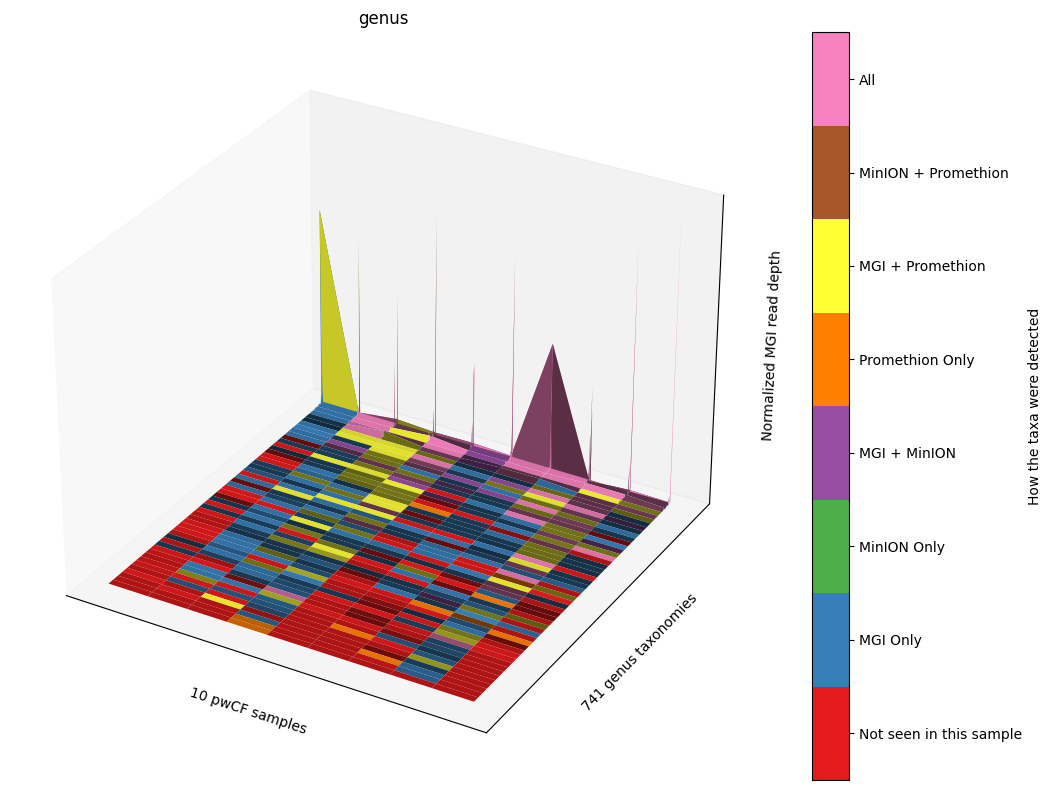

In [18]:
taxonomies = ['phylum', 'class', 'order', 'family', 'genus']

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf']
cmap = ListedColormap(colors)

row = 0
col = 0
for i, tax in enumerate(taxonomies):
    # read the data 
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
    min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])
    pro_df = read_taxonomy(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", tax[0])
    common_taxonomies = mgi_df.index.intersection(min_df.index).intersection(pro_df.index)


    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_df_l = mgi_df.loc[common_taxonomies]
    min_df_l = min_df.loc[common_taxonomies]
    pro_df_l = pro_df.loc[common_taxonomies]
    
    sboth = sorted_presence_absence(mgi_df_l, min_df_l, pro_df_l, minrowsum=0, asc_sort=True)
    x, y, z = convert_df_xyz(mgi_df_l, sboth)


    # Define a color map based on the heatmap values
    colors = cmap(sboth.values / sboth.values.max())

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', vmin=0, vmax=8, antialiased=True)
    

    # Set labels
    ax.title.set_text(tax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    ax.set_zlabel("Normalized MGI read depth")

    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
        

    # Show color bar
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(np.linspace(0, 8, 256))  # Color bar mapping
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label('How the taxa were detected')
    cbar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
    cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'MGI + MinION', 'Promethion Only', 'MGI + Promethion', 'MinION + Promethion', 'All'])
    plt.tight_layout()  # Adjust layout to make room for the x-axis labels
    fig.savefig(f"img/3D-{tax}-pro-min-mgi.svg")
    fig.savefig(f"img/3D-{tax}-pro-min-mgi.png")
    plt.show()

# Limiting the data

We have a loooong tail on our MGI coverage, but I'm not sure how long. Lets take a look and see if we can come up with a sensible cutoff (e.g. 1% or 10%?)

In [19]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])

common_columns = min_df.columns.intersection(mgi_df.columns)
mgi_df = mgi_df[common_columns]
min_df = min_df[common_columns]

mgi_max = mgi_df.max().max()
mgi_max_sample = mgi_df.max().idxmax()
mgi_max_sp = mgi_df[mgi_df[mgi_df.max().idxmax()] == mgi_df.max().max()].index[0]

min_max = min_df.max().max()
min_max_sample = min_df.max().idxmax()
min_max_sp = min_df[min_df[min_df.max().idxmax()] == min_df.max().max()].index[0]

mgi_min_max_val = mgi_df.loc[min_max_sp, min_max_sample].max()
min_mgi_max_val = min_df.loc[mgi_max_sp, mgi_max_sample].max()

print(f"""
For the MGI sequencing, the most abundant genus was _{mgi_max_sp}_, with a normalised abundance \
of {mgi_max:,.2f} RPMM in the sample {mgi_max_sample}, while for the MinION sequencing the most \
abundant genus is also _{min_max_sp}_, with a normalised abundance of {min_max:,.2f} RPMM \
in sample {min_max_sample}.

The abundance of _{mgi_max_sp}_ in the MinION data from sample {mgi_max_sample} is {min_mgi_max_val:,.2f}.
The abundance of _{min_max_sp}_ in the MGI data from sample {min_max_sample} is {mgi_min_max_val:,.2f}.
""")




For the MGI sequencing, the most abundant genus was _g__Streptococcus_, with a normalised abundance of 610,293.52 RPMM in the sample 642660_20180601_S, while for the MinION sequencing the most abundant genus is also _g__Streptococcus_, with a normalised abundance of 680,910.15 RPMM in sample 1586713_20180309_S.

The abundance of _g__Streptococcus_ in the MinION data from sample 642660_20180601_S is 584,032.58.
The abundance of _g__Streptococcus_ in the MGI data from sample 1586713_20180309_S is 594,382.79.



Shape now: (3581, 127)
Shape now: (3164, 127)


<Axes: xlabel='877469_20190115_S', ylabel='Count'>

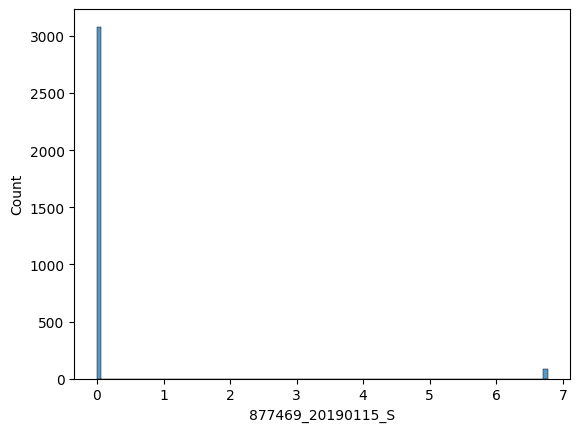

In [20]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])

print(f"Shape now: {mgi_df.shape}")
maxcol = mgi_df.max().idxmax()
mgi_df = mgi_df[mgi_df[maxcol] < 10]
print(f"Shape now: {mgi_df.shape}")
sns.histplot(mgi_df[maxcol], bins=100)

# note that a normalised value of 10 means 100 reads per million reads mapped

The largest value is 680,910.15 in 1586713_20180309_S
The taxonomy is Index(['g__Streptococcus'], dtype='object', name='taxonomy')
Shape now: (1433, 60)
Shape now: (1413, 60)


<Axes: xlabel='1586713_20180309_S', ylabel='Count'>

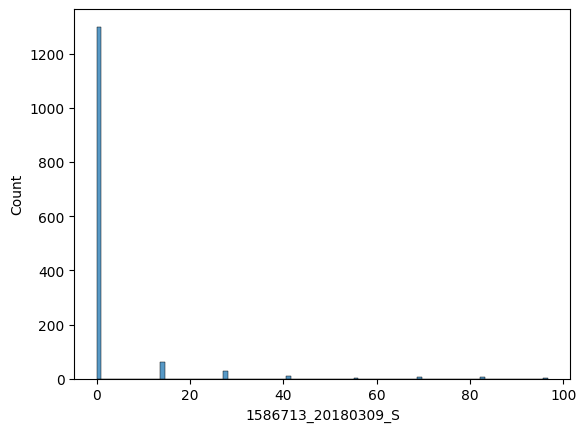

In [21]:
tax='genus'
# read the data 
mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0])
min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0])
print(f"The largest value is {min_df.max().max():,.2f} in {min_df.max().idxmax()}")

tophit = min_df[min_df[min_df.max().idxmax()] == min_df.max().max()]
print(f"The taxonomy is {tophit.index}")


print(f"Shape now: {min_df.shape}")
maxcol = min_df.max().idxmax()
min_df = min_df[min_df[maxcol] < 100]
print(f"Shape now: {min_df.shape}")
sns.histplot(min_df[maxcol], bins=100)

# note that a normalised value of 10 means 100 reads per million reads mapped

## Limiting the visualisation to those samples with at least 10 reads per million mapped reads

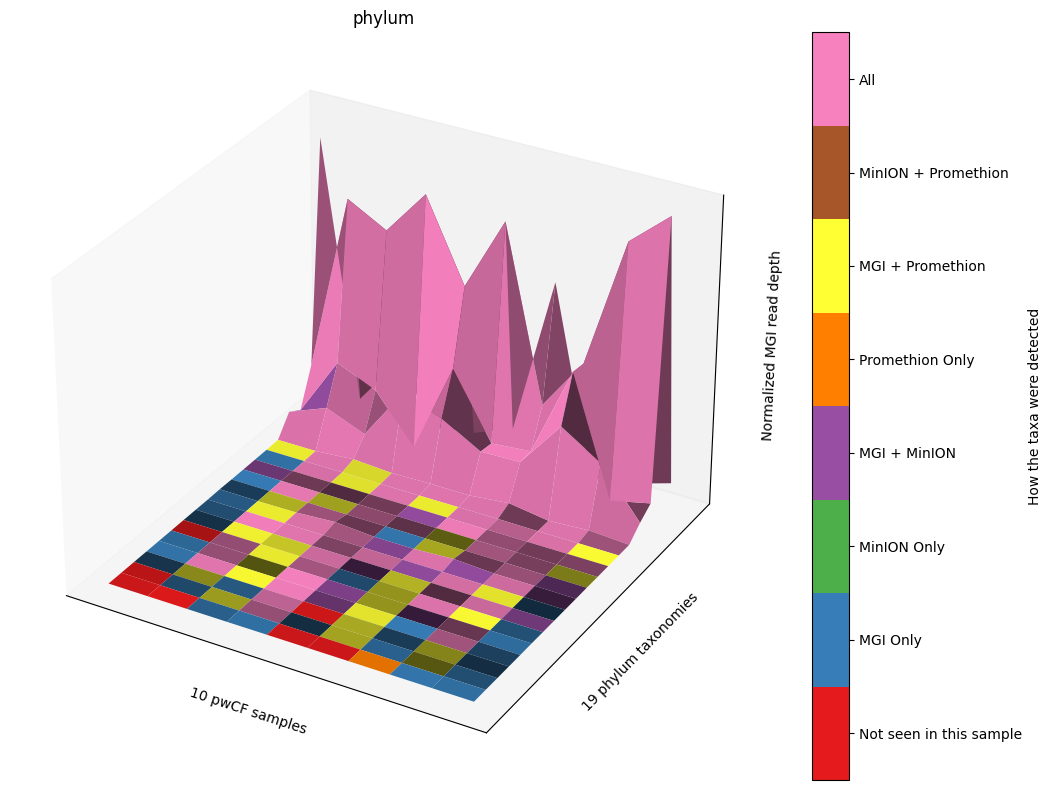

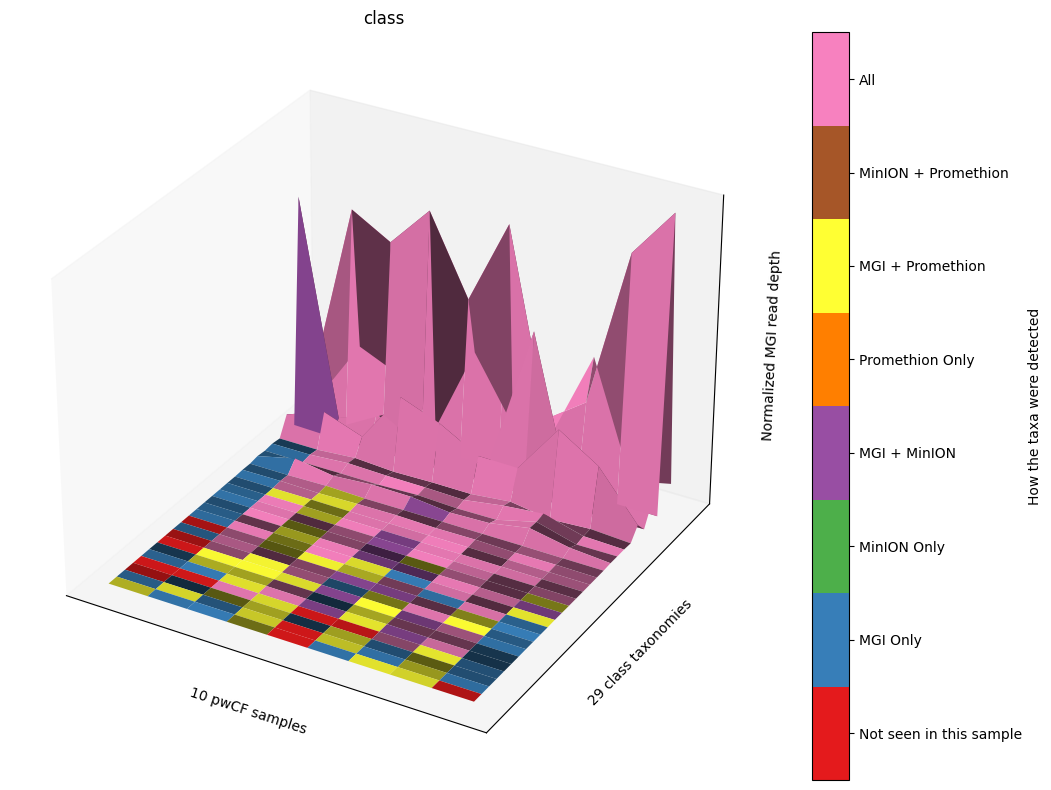

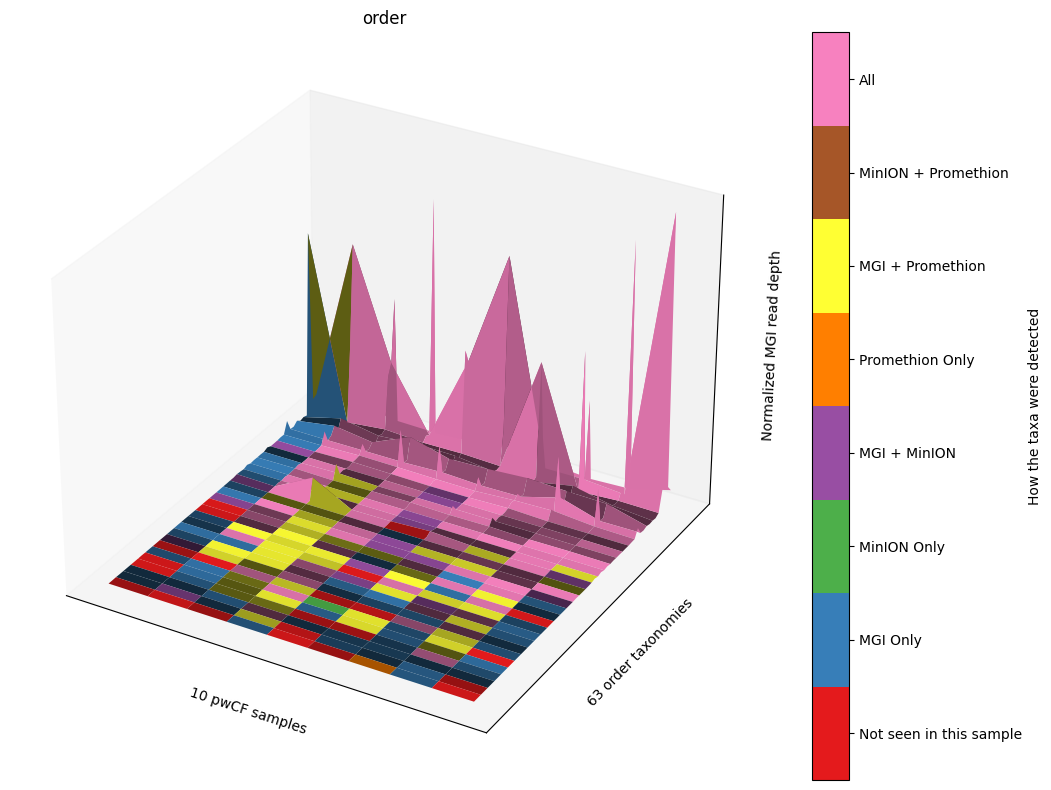

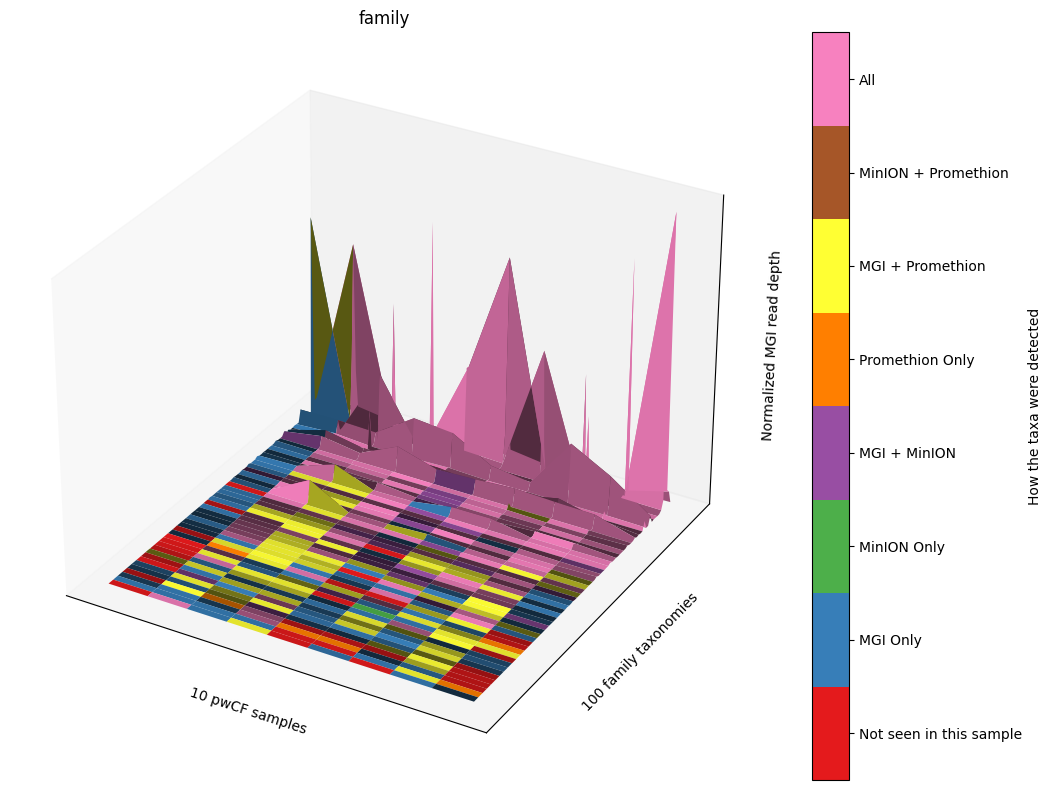

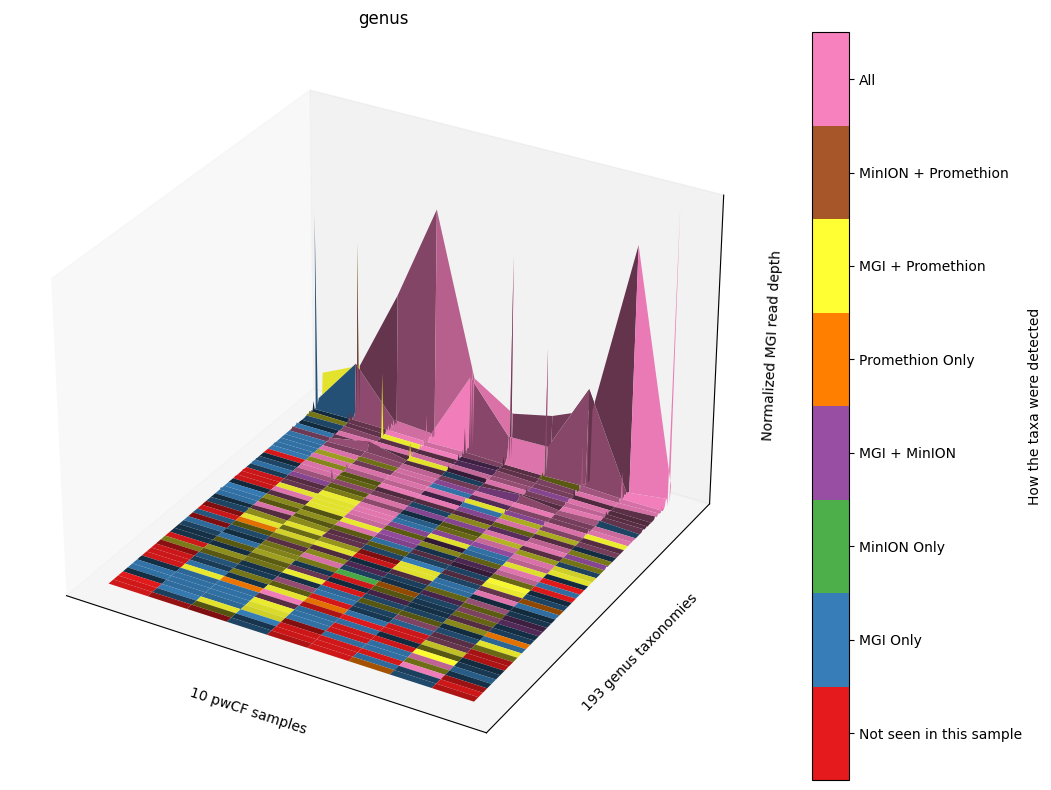

In [22]:
taxonomies = ['phylum', 'class', 'order', 'family', 'genus']

row = 0
col = 0
minreads = 10
for i, tax in enumerate(taxonomies):
    mgi_df = read_taxonomy(f"../MGI/Taxonomy/MGI_reads_{tax}.normalised.tsv.gz", tax[0], minreads)
    min_df = read_taxonomy(f"../MinION/Taxonomy/minion_reads_{tax}.normalised.tsv.gz", tax[0], minreads)
    pro_df = read_taxonomy(f"../Promethion/Taxonomy/Promethion_{tax}.norm.tsv.gz", tax[0], minreads)
    common_taxonomies = mgi_df.index.intersection(min_df.index).intersection(pro_df.index)


    # Create subsets of the DataFrames containing only the common taxonomies
    mgi_df_l = mgi_df.loc[common_taxonomies]
    min_df_l = min_df.loc[common_taxonomies]
    pro_df_l = pro_df.loc[common_taxonomies]
    
    sboth = sorted_presence_absence(mgi_df_l, min_df_l, pro_df_l, minrowsum=0, asc_sort=True)
    x, y, z = convert_df_xyz(mgi_df_l, sboth)


    # Define a color map based on the heatmap values
    colors = cmap(sboth.values / sboth.values.max())

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.plot_surface(x,y,z, facecolors=colors, edgecolor='None', vmin=0, vmax=3, antialiased=True)
    

    # Set labels
    ax.title.set_text(tax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f"{sboth.shape[1]} pwCF samples")
    ax.set_ylabel(f"{sboth.shape[0]} {tax} taxonomies")
    ax.set_zlabel("Normalized MGI read depth")

    if i == 2:
        row = 1
        col = 0
    else:
        col += 1
        
        

    # Show color bar
    mappable = plt.cm.ScalarMappable(cmap=cmap)
    mappable.set_array(np.linspace(0, 8, 256))  # Color bar mapping
    cbar = plt.colorbar(mappable, ax=ax)
    cbar.set_label('How the taxa were detected')
    cbar.set_ticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
    cbar.ax.set_yticklabels(["Not seen in this sample", "MGI Only", 'MinION Only', 'MGI + MinION', 'Promethion Only', 'MGI + Promethion', 'MinION + Promethion', 'All'])
    plt.tight_layout()  # Adjust layout to make room for the x-axis labels

    fig.savefig(f"img/3D-{tax}-{minreads}.svg")
    fig.savefig(f"img/3D-{tax}-{minreads}.png")
    plt.show()